# Wine test

##### Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn import metrics

##### Importing datasets

In [2]:
df1 = pd.read_csv("winequality-red.csv", sep=";")
df1.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df2 = pd.read_csv("winequality-white.csv", sep = ";")
df2.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


##### Adding a column with the color of the wine i.e., red or white wine and then merging the two dataframes

In [4]:
df1["color"] = pd.Series(["red" for x in range(len(df1.index))])
df2["color"] = pd.Series(["white" for x in range(len(df2.index))])
df3 = df1.append(df2)
df3.head()

/var/folders/bp/xcn4mbr53tscnw24mpsq4m0m0000gn/T/ipykernel_57031/1547862759.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df3 = df1.append(df2)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [5]:
df1.shape, df2.shape, df3.shape

((1599, 13), (4898, 13), (6497, 13))

In [6]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 710.6+ KB


In [7]:
df3.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


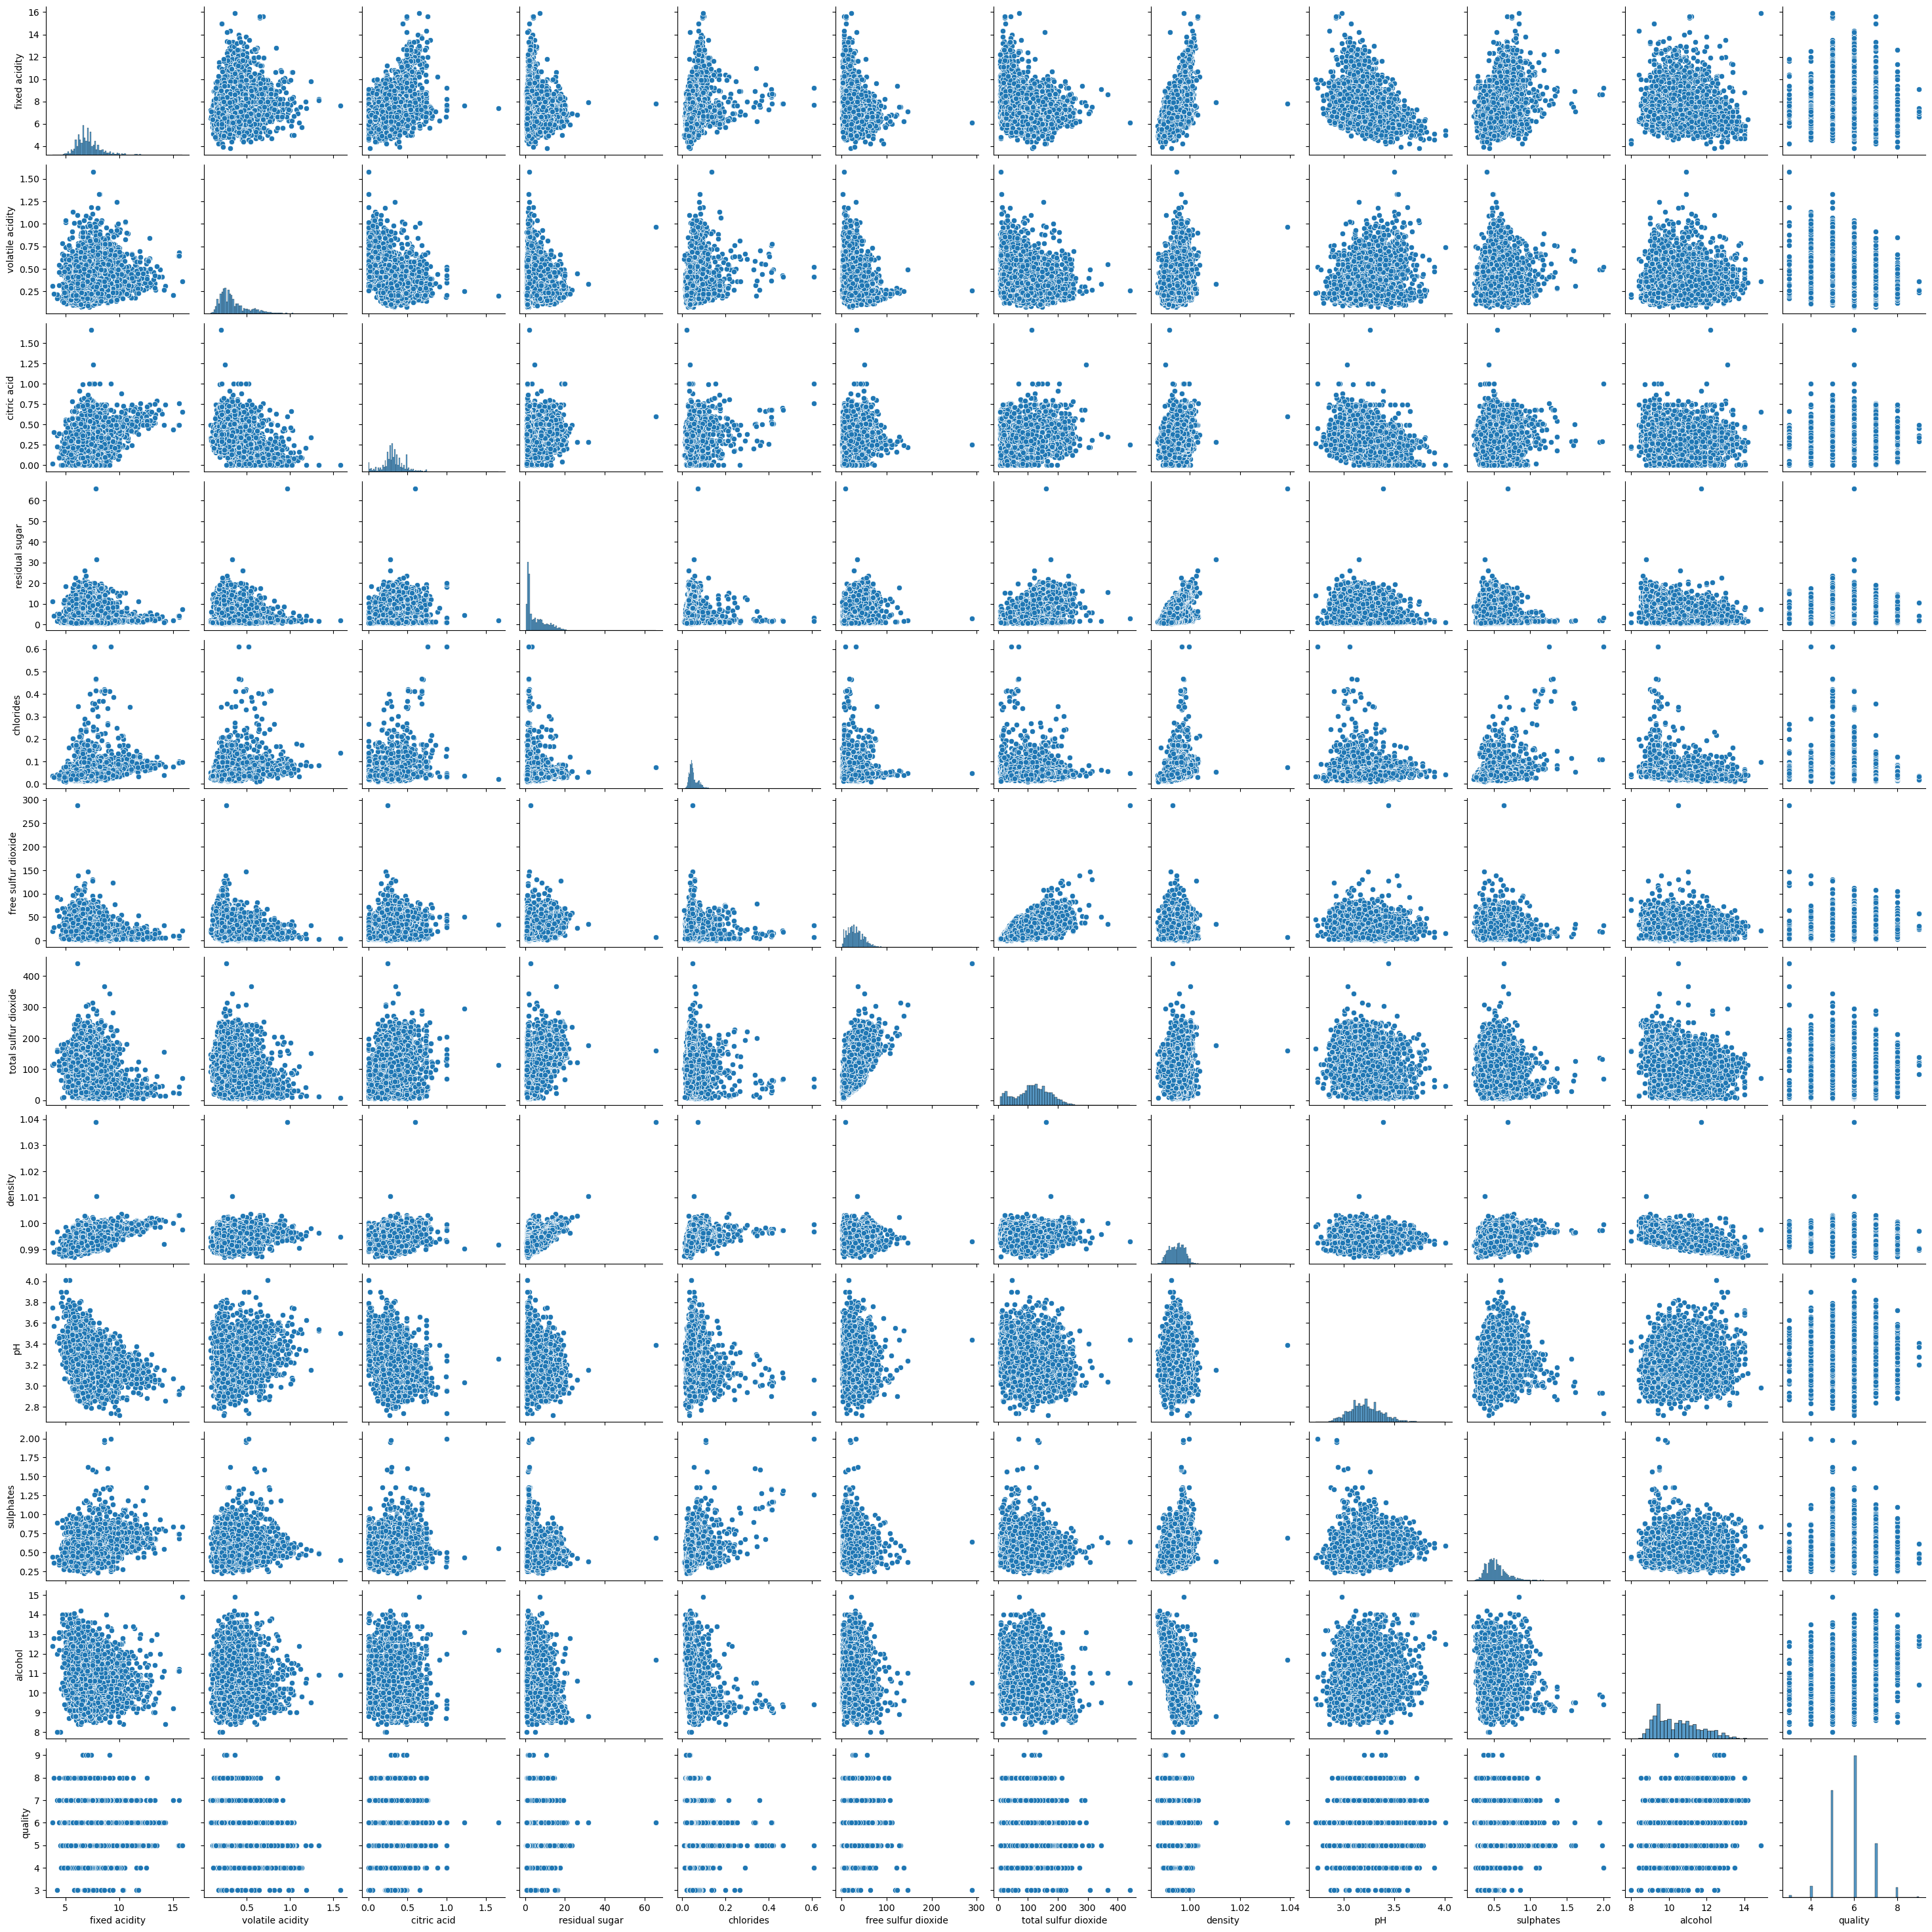

In [8]:
sns.pairplot(df3)

The diagonal of the plot-matrix shows the histograms between different features. All plots visibly show a normal distribution (with and without skeweness and kurtosis). This means a linear regression can be tried on the data.

In [9]:
df3.nunique()

fixed acidity           106
volatile acidity        187
citric acid              89
residual sugar          316
chlorides               214
free sulfur dioxide     135
total sulfur dioxide    276
density                 998
pH                      108
sulphates               111
alcohol                 111
quality                   7
color                     2
dtype: int64

This means there are only seven distinct entries in the target variable. Hence, the problem is that of classification.

In [10]:
df3.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
color                   0
dtype: int64

In [11]:
df3 = pd.get_dummies(df3, drop_first=True)
df3.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color_white
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


### Principal Component Analysis

In [12]:
df4 = df3.drop(columns = ["quality"], axis = 1)
narr = df4.values
df4.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,color_white
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [13]:
scaled_df = scale(df4)
scaled_df.shape

(6497, 12)

In [14]:
pca = PCA()
pca_val = pca.fit_transform(scaled_df)
df_pca = pd.DataFrame(pca_val)
df_pca.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,3.736061,-0.141167,-2.639176,-0.812551,-0.162601,-0.238104,0.354928,-0.489758,-0.042190,-0.046336,-0.194586,0.065634
1,3.682274,0.560824,-1.956191,-0.787450,1.300274,1.648933,-0.211118,-0.469213,-0.493986,0.219544,-0.186868,0.015595
2,3.663686,0.327782,-1.655090,-0.818451,0.770879,0.820245,-0.239111,-0.412437,-0.314528,0.081784,-0.026763,0.048805
3,2.479364,1.825784,2.619935,-0.280129,-0.661395,-0.544770,1.146723,-0.814995,0.541520,-0.110617,0.310783,-0.233726
4,3.736061,-0.141167,-2.639176,-0.812551,-0.162601,-0.238104,0.354928,-0.489758,-0.042190,-0.046336,-0.194586,0.065634


In [15]:
var = pca.explained_variance_ratio_
cum_var = np.cumsum(np.round(var, decimals= 3)*100)
cum_var

array([31.7, 52.8, 65.8, 73.9, 79.9, 85. , 89.5, 93.7, 96.6, 98.7, 99.7,
       99.9])

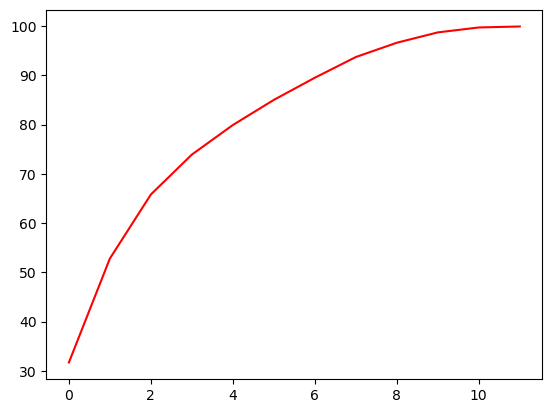

In [16]:
plt.plot(cum_var, color = 'red')

At least seven principal components need to be taken into account while performing analysis

<Axes: xlabel='quality', ylabel='count'>

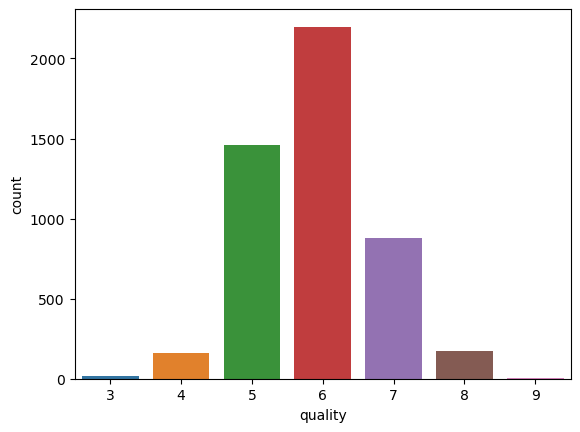

In [17]:
sns.countplot(df2, x = 'quality')

This means there are seven classes in the input data as per the "quality" feature which is the target variable. 

In [18]:
hc_full = AgglomerativeClustering(n_clusters = 7, affinity='euclidean', linkage='average')
y_hc_full = hc_full.fit_predict(df_pca)
Clusters_full=pd.DataFrame(y_hc_full,columns=['Clusters'])
Clusters_full.value_counts()

/Users/hari/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Clusters
0           6462
6             22
2              8
1              2
3              1
4              1
5              1
dtype: int64

Agglomerative clustering classifies too many entries into one class and a few in other classes. This is not realistic. Hence we look for solutions based on KMeans clustering

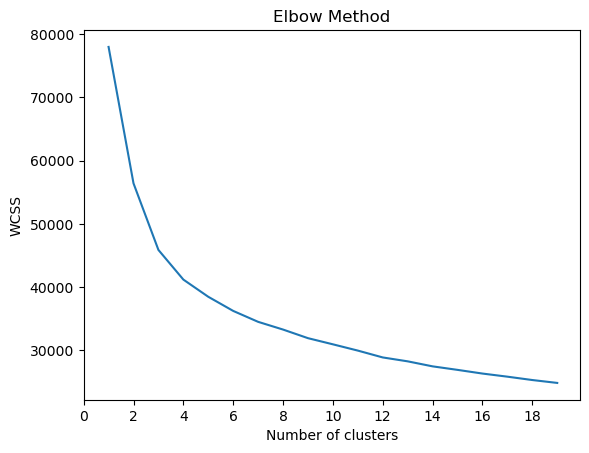

In [19]:
warnings.filterwarnings('ignore')
wcss_full = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i,random_state=145)
    kmeans.fit(df_pca)
    wcss_full.append(kmeans.inertia_)
    
plt.plot(range(1, 20), wcss_full)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
xtick_list = np.arange(0,20,2)
plt.xticks(xtick_list)
plt.show()

In [20]:
kmeans_full = KMeans(n_clusters=7,random_state=42)
kmeans_full.fit(df_pca)
metrics.silhouette_score(df_pca, kmeans.labels_)

0.1384428408689574

In [21]:
kmeans_full = KMeans(n_clusters=7,random_state=42)
kmeans_full.fit(df4)
metrics.silhouette_score(df4, kmeans.labels_)

-0.15279654931045183

The Silhouette score in the case of dataframes with and without performing PCA shows that when the dataframe without PCA treatment is used for conducting KMeans clustering, the silhouette score is negative indicating a bad score and when the dataframe with PCA treatment is used for conducting KMeans clustering, the silhouette score is positive indicating a good score. This shows the importance of PCA while performing analysis on the given dataset.